# 04-extract_tdms

This notebook extracts time delayed melody surface from the predominant melody of each audio recording. The feature was introduced in:

> Gulati S, Serrà J, Ganguli K K, Şentürk S, Serra X. Time-delayed melody surfaces for Rāga recognition. In Proceedings of the 17th International Society for Music Information Retrieval Conference (ISMIR 2016); 2016 Aug 7-11; New York City (NY). p. 751-7.


In [1]:
import mre

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
# def bhat(mtx1, mtx2):
#     return -np.log(np.sum(np.sqrt(mtx1 * mtx2)))

# # code ported from https://github.com/sankalpg/Library_PythonNew
# EPS = np.finfo(np.float).resolution
# def sym_kld(mtx1, mtx2):
#     mtx1 = mtx1 + EPS
#     mtx2 = mtx2 + EPS
#     return mtx1 * np.log(mtx1/mtx2) + mtx2 * np.log(mtx2/mtx1)  

## Stop if pitch class distibution was run in the past

Extracting the feature may take a long time. It is better to check if there is already a run in advance.

In [4]:
# run = mre.mlflow_common.get_run_by_name(
#     mre.data.PitchClassDistribution.EXPERIMENT_NAME,
#     mre.data.PitchClassDistribution.RUN_NAME)

# if run is not None:
#     raise ValueError(
#         "There is already a run for %s:%s. Overwriting is not "
#         "permitted. Please delete the run manually if you want "
#         "to extract the pitch class distribution again."
#         % (mre.data.PitchClassDistribution.RUN_NAME, run.run_id))


# Read predominant melody filepaths from mlflow


In [5]:
melody_paths = mre.data.PredominantMelodyMakam.from_mlflow()
display(melody_paths[:5])

['/data/artifacts/1/2608c404325846309549b68e5020bd17/artifacts/006536f8-bf54-4cc0-a510-5a52456d09f8.npy',
 '/data/artifacts/1/2608c404325846309549b68e5020bd17/artifacts/009309d2-c260-4808-8f1d-44a5ddc6bc5f.npy',
 '/data/artifacts/1/2608c404325846309549b68e5020bd17/artifacts/00a48b5f-a35a-436c-a7a0-4438130f4abf.npy',
 '/data/artifacts/1/2608c404325846309549b68e5020bd17/artifacts/00ab81ec-07f8-47ba-9610-47ad56393eb9.npy',
 '/data/artifacts/1/2608c404325846309549b68e5020bd17/artifacts/00be9a4b-b85f-4601-a6d5-9ce1f5b3f91c.npy']

# Read tonic annotations from mlflow

In [6]:
annotations = mre.data.Annotation.from_mlflow()
tonic_frequencies = annotations.data.set_index("mbid")["tonic"]
tonic_frequencies.head()


mbid
00f1c6d9-c8ee-45e3-a06f-0882ebcb4e2f    256.0
168f7c75-84fb-4316-99d7-acabadd3b2e6    115.2
24f549dd-3fa4-4e9b-a356-778fbbfd5cad    232.5
407bb0b4-f19b-42ab-8c0a-9f1263126951    233.5
443819eb-6092-420c-bd86-d946a0ad6555    219.6
Name: tonic, dtype: float64

# Extract TDMSs from normalized predominant melody features and log to mlflow


In [7]:
# pcd = mre.data.TimeDelayedMelodySurface()
# pcd.transform(melody_paths, tonic_frequencies)
# pcd.log()


In [8]:
from pathlib import Path
mel_mbids = [Path(pp).stem for pp in melody_paths]
tonic_mbids = list(tonic_frequencies.index)

# Compute for one

788b802a-4212-4ec5-9494-abdbde9409a6
/data/artifacts/1/2608c404325846309549b68e5020bd17/artifacts/788b802a-4212-4ec5-9494-abdbde9409a6.npy


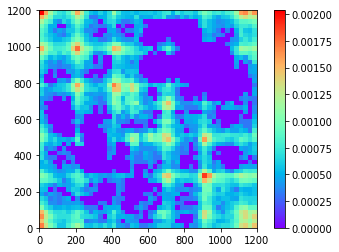

In [26]:
makam_idx = annotations.data[annotations.data["makam"] == "Acemasiran"].index

mbid = annotations.data.iloc[makam_idx[8]].mbid
print(mbid)

for path in melody_paths:
    if mbid in path:
        melody = np.load(path)
        break
        
print(path)

ref_freq = tonic_frequencies.loc[mbid]

STEP_SIZE = 25.0  # same as pcd
TIME_DELAY_INDEX = 0.3
COMPRESSION_EXPONENT = 0.25
KERNEL_WIDTH = 1

tdms_obj = mre.data.TDMSFeature.from_hz_pitch(
    melody,
    ref_freq=ref_freq,
    step_size=STEP_SIZE,
    time_delay_index=TIME_DELAY_INDEX,
    compression_exponent=COMPRESSION_EXPONENT,
    kernel_width=0
)
tdms_obj.plot()

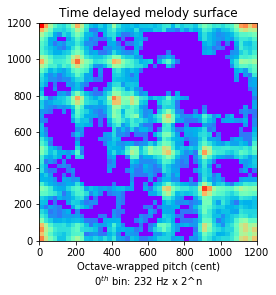

In [34]:
tdms_obj.plot()


In [39]:
mre.data.TDMSFeature(**tdms_obj.__dict__) == tdms_obj

False